# IMPORTS

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# test this works on your machine
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [114]:
S = pd.read_csv('../data/ds_salaries.csv')
target_v = 'salary_in_usd'
S = S.drop(['salary','remote_ratio', 'salary_currency'], axis = 1)
# S = S.drop('experience_level', axis = 1)
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   company_location    3755 non-null   object
 7   company_size        3755 non-null   object
dtypes: int64(2), object(6)
memory usage: 234.8+ KB


# EDA

Taking an exploratory analysis

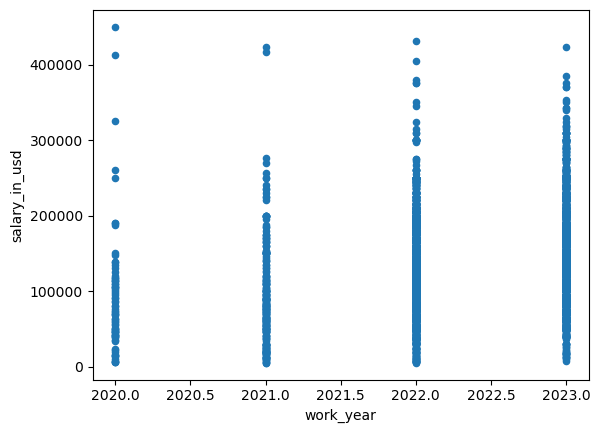

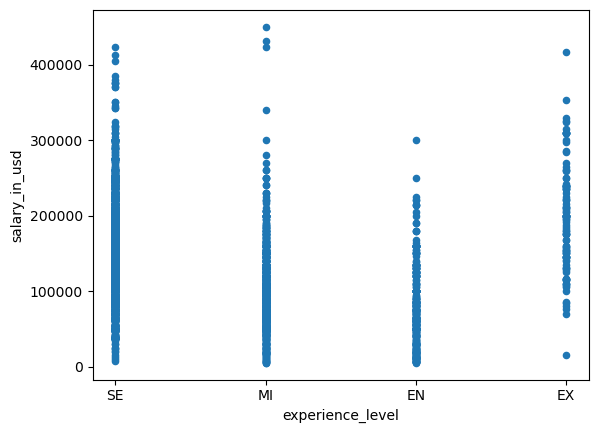

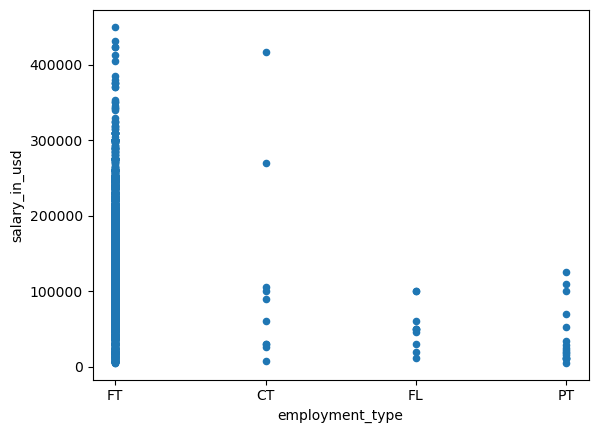

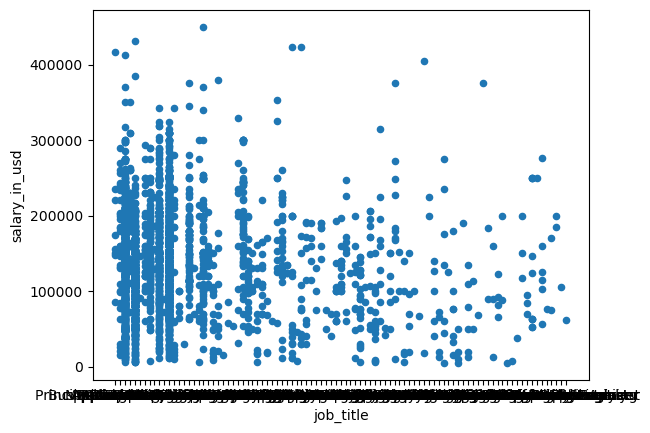

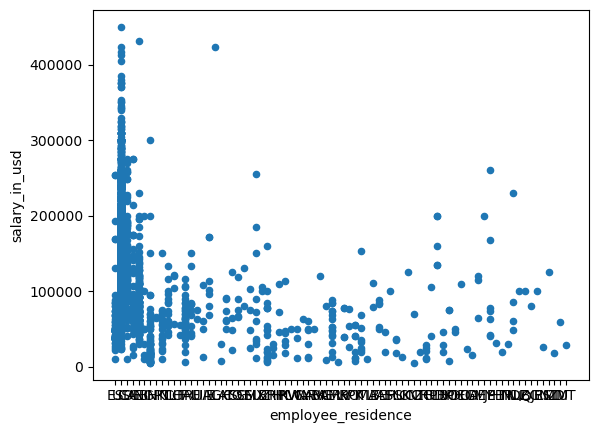

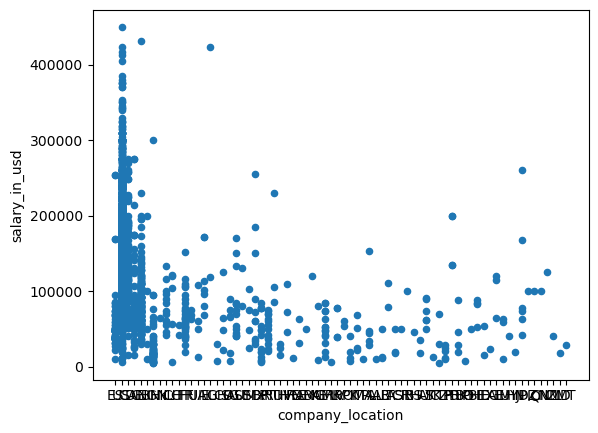

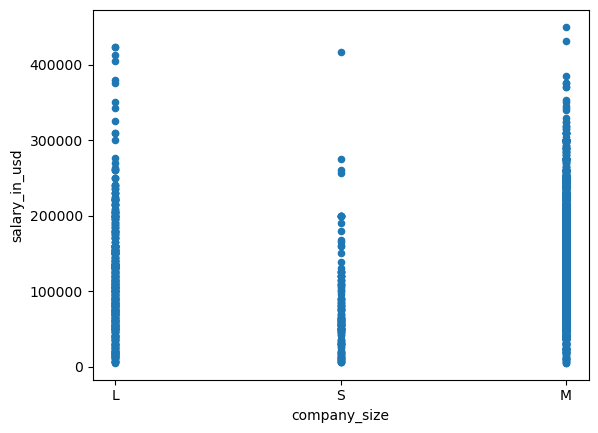

In [116]:
for col in S.drop('salary_in_usd', axis = 1):
    try:    
        S.plot.scatter(x=col, y='salary_in_usd')
        plt.show()
    except:
        print(col)

In [117]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Transforming Dummies

Creating dummy variables and reforming the DF

In [118]:
string_cols1 = []
numeric_cols1 = []
for key, val in S.iloc[44].to_dict().items():
    if isinstance(val, str):
        string_cols1.append(key)
    else:
        numeric_cols1.append(key)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Test numeric columns for multicolinearity

In [120]:
vif_data = pd.DataFrame()
vif_data["feature"] = S._get_numeric_data().columns
vif_data['VIF'] = [variance_inflation_factor(XS.values, i) for i in range(len(S._get_numeric_data().columns))]
print(vif_data)

         feature       VIF
0      work_year  1.488879
1  salary_in_usd       inf


c:\Users\msciz\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Putting the numeric and dummy columns together

In [121]:
numeric_from_df1 = S[numeric_cols1]
dummy_vars1 = pd.get_dummies(S[string_cols1])

In [122]:
S = pd.concat([numeric_from_df1, dummy_vars1], axis = 1)

Creating variables for the model

In [123]:

YS = S[target_v]
XS = S.drop(target_v, axis = 1)

### Running the Model

Creates and runs the model, taking the average of 100 random train test splits

In [126]:
dtree = tree.DecisionTreeRegressor(max_depth = 10, min_samples_leaf= 0.0005)

In [127]:
scores = []
scoresneg = []
for x in range(100):
    Xt, Xe, Yt, Ye = train_test_split(XS, YS, test_size = 0.3)
    dtree= dtree.fit(Xt, Yt)
    if dtree.score(Xe, Ye) >0:
        scores.append(dtree.score(Xe, Ye))
    else:
        scoresneg.append(dtree.score(Xe, Ye))

print(sum(scores)/len(scores))
print(scoresneg)

0.3683328735841402
[]
